      Feature 1  Feature 2  Feature 3  Feature 4
0       3.62160    8.66610    -2.8073   -0.44699
1       4.54590    8.16740    -2.4586   -1.46210
2       3.86600   -2.63830     1.9242    0.10645
3       3.45660    9.52280    -4.0112   -3.59440
4       0.32924   -4.45520     4.5718   -0.98880
...         ...        ...        ...        ...
1367    0.40614    1.34920    -1.4501   -0.55949
1368   -1.38870   -4.87730     6.4774    0.34179
1369   -3.75030  -13.45860    17.5932   -2.77710
1370   -3.56370   -8.38270    12.3930   -1.28230
1371   -2.54190   -0.65804     2.6842    1.19520

[1372 rows x 4 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64
      Feature 1  Feature 2  Feature 3  Feature 4  Class
0       3.62160    8.66610    -2.8073   -0.44699      0
1       4.54590    8.16740    -2.4586   -1.46210      0
2       3.86600   -2.63830     1.9242    0.10645      0
3       3.456

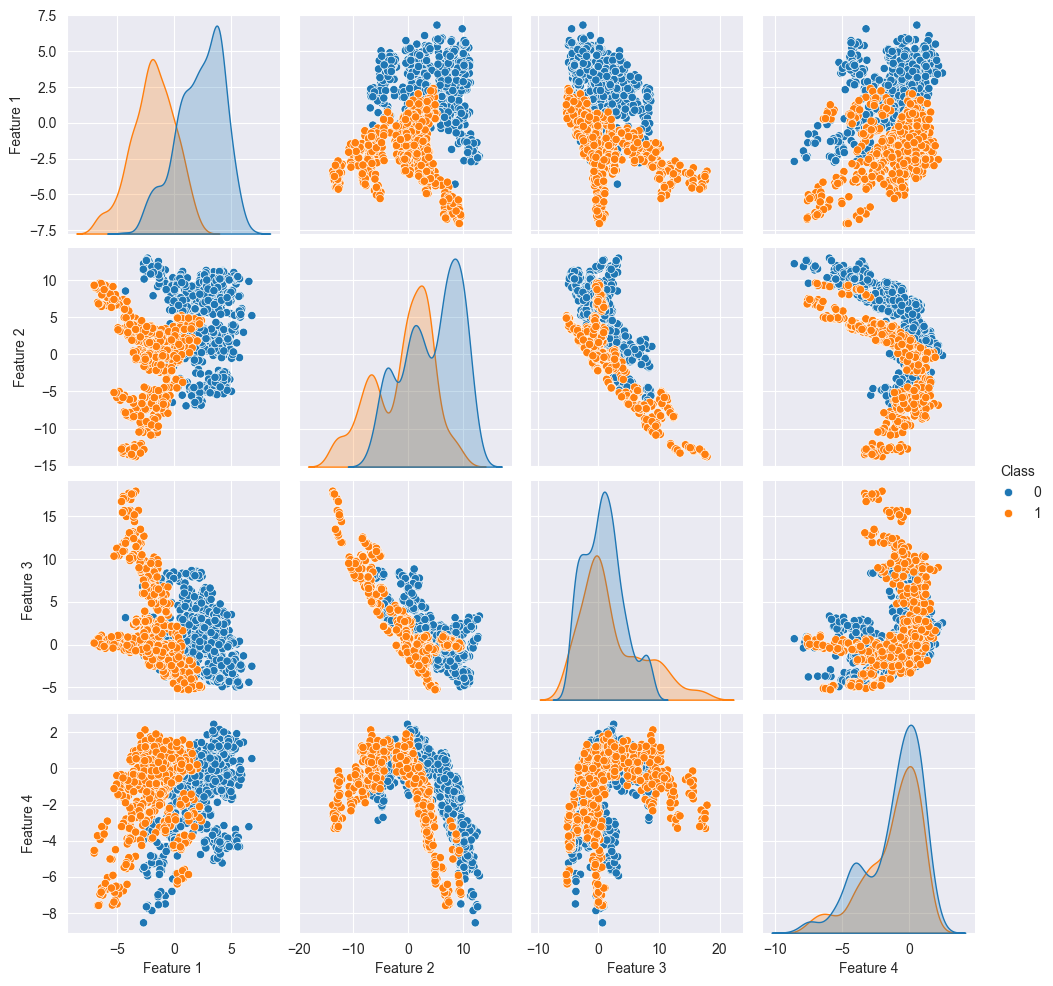

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns

column_names = [
    'Feature 1',
    'Feature 2',
    'Feature 3',
    'Feature 4',
    'Class',
]
# import wine dataset
bank_authentication = pd.read_csv('C:/Users/akana/Masaüstü/data_banknote_authentication.txt', names=column_names)
y = bank_authentication.iloc[:, -1]
x = bank_authentication.iloc[:, :-1]
print(x)
print(y)
print(bank_authentication)
sns.pairplot(bank_authentication,hue='Class')
plt.show()

In [19]:
# Split the data as training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=0)

Accuracy: 0.99


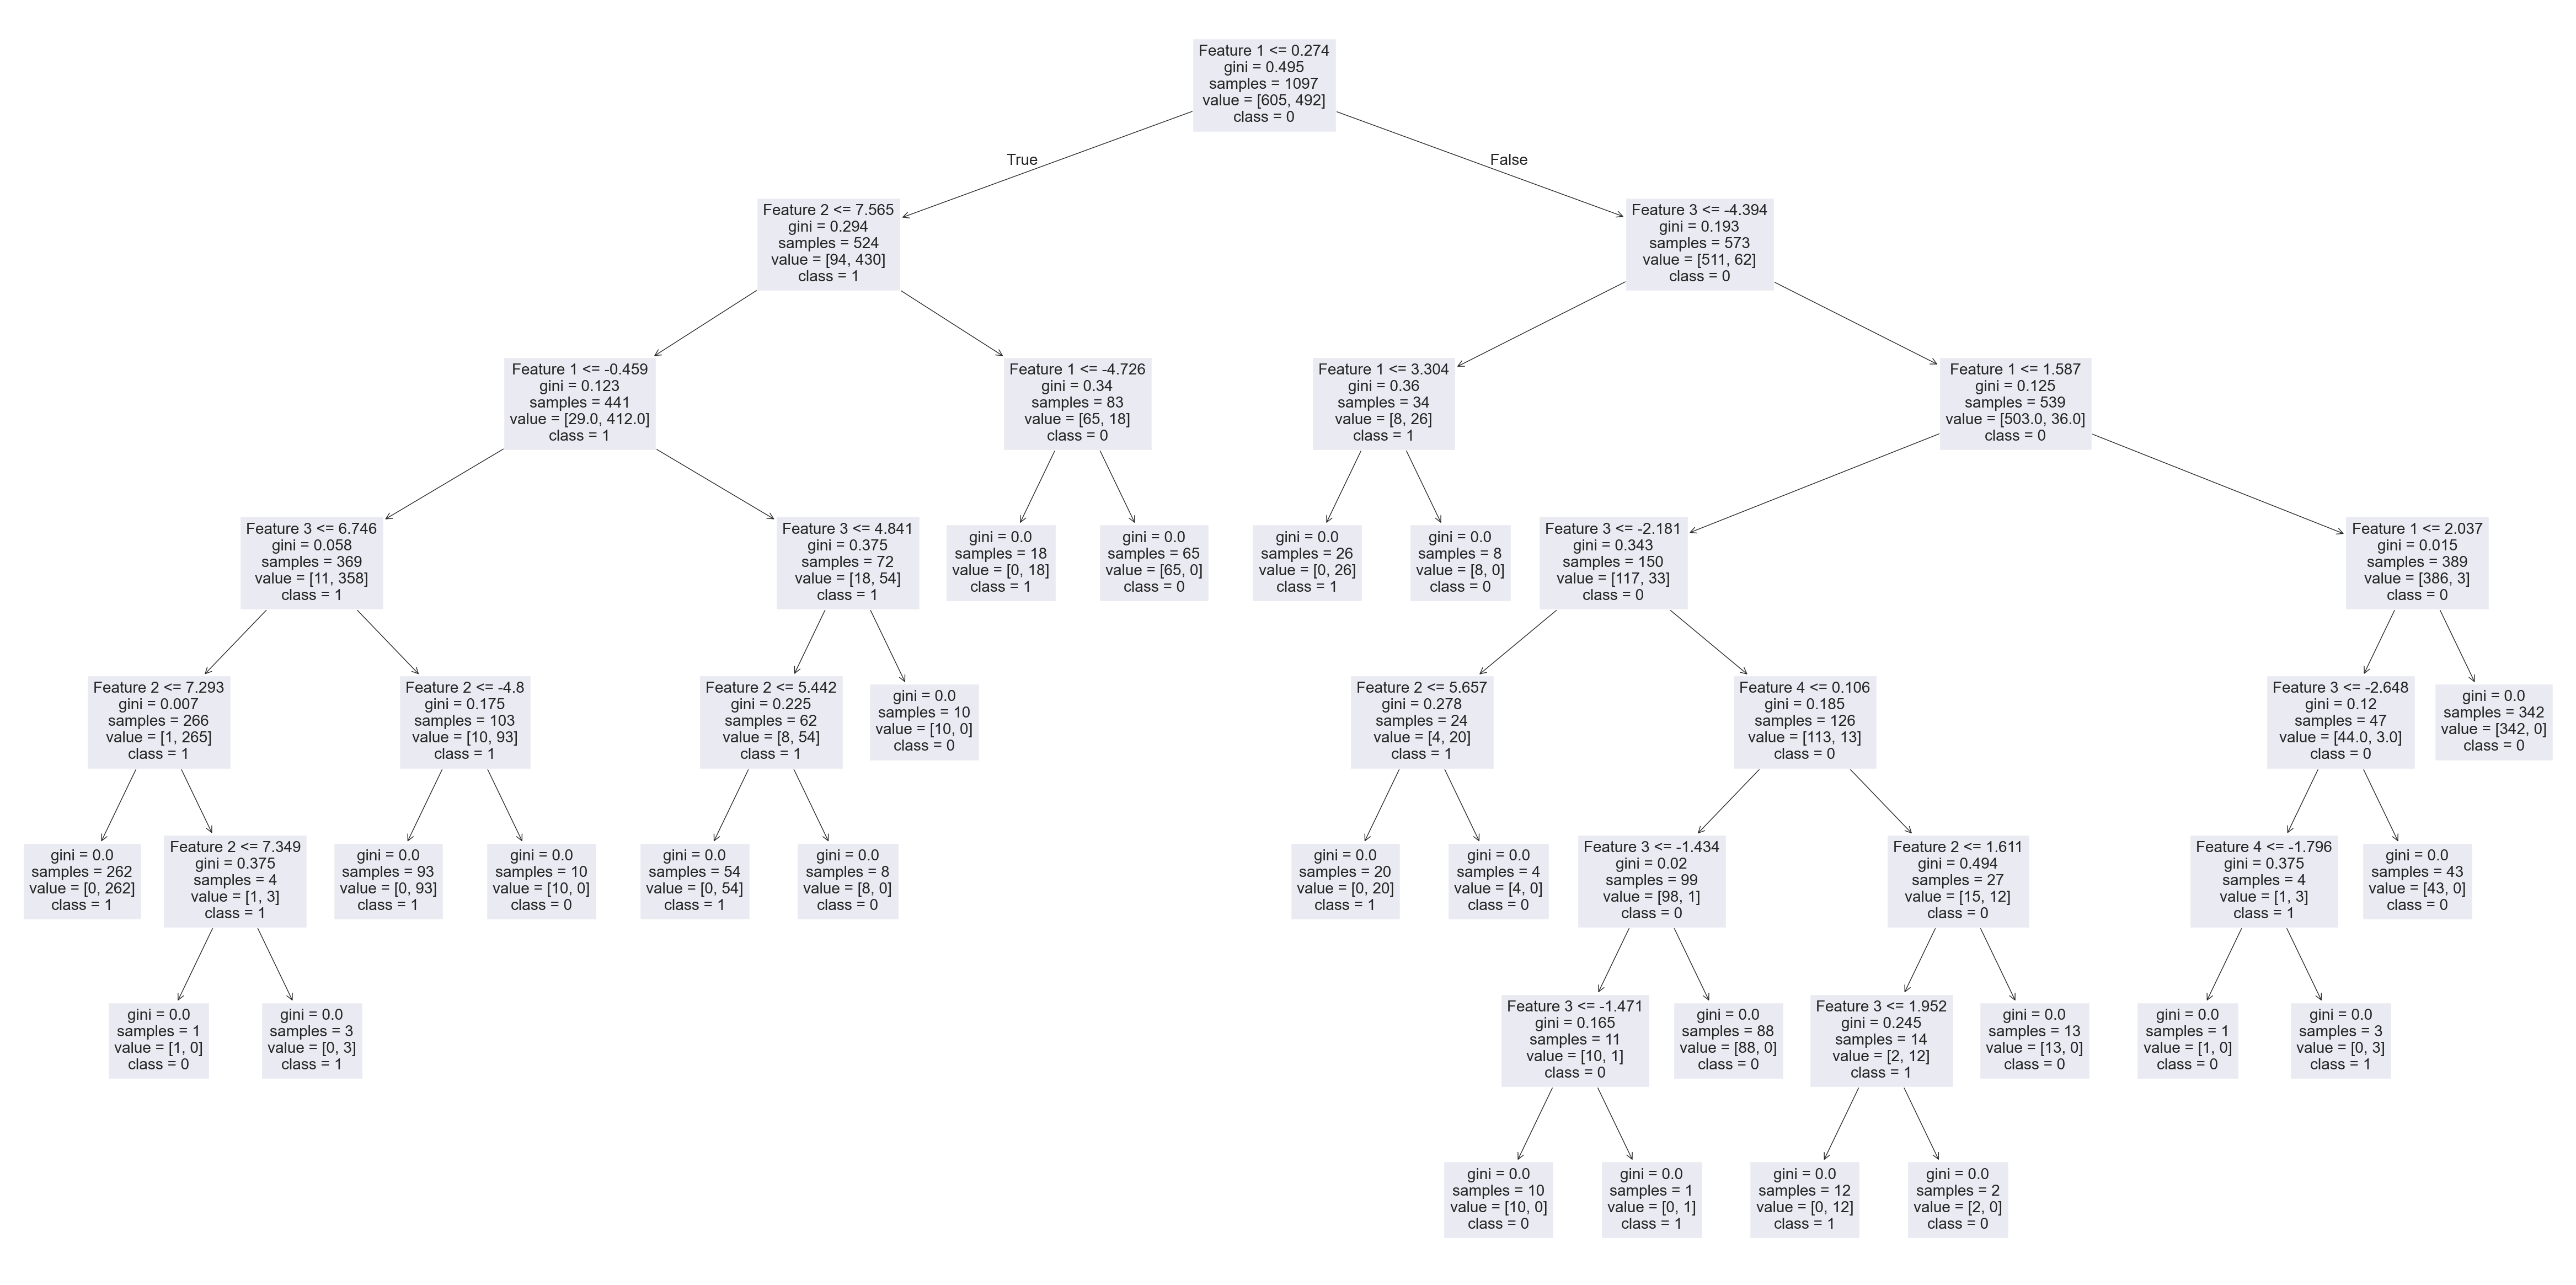

In [26]:
# Apply the built in function sklearn decision tree function
tre=DecisionTreeClassifier(criterion='gini',max_depth=8,random_state=30)
# tre=DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=30) # For the entropy calculation
tre=tre.fit(x_train,y_train)
y_pred= tre.predict(x_test) # Using predict function to decide the class
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Plotting the decision tree
plt.figure(figsize=(60, 30))
plot_tree(tre,feature_names=column_names,class_names=['0','1'])
plt.show()

     Feature  Importance
0  Feature 1    0.615807
1  Feature 2    0.225646
2  Feature 3    0.141033
3  Feature 4    0.017514


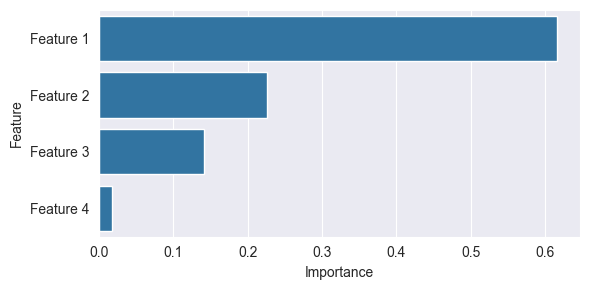

In [29]:

imp = tre.feature_importances_  # assigning importance to a variable
feature_names = x.columns       # assigning feature names
# DataFrame
imp_df = pd.DataFrame({'Feature': feature_names,'Importance': imp}).sort_values(by='Importance', ascending=False)
print(imp_df)
# Plotting the importance
plt.figure(figsize=(6, 3))
sns.barplot(x='Importance', y='Feature', data=imp_df)
plt.tight_layout()
plt.show()

In [22]:
# Confusion Matrix for sklearn KNN
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[155   2]
 [  0 118]]


In [23]:
# Classification Report for sklearn KNN
class_report = classification_report(y_test, y_pred,zero_division=0)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       157
           1       0.98      1.00      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

